## Bäckerei-Umsatzdaten

Wichtige Links: <br>
- [Handbuch](https://opencampus.gitbook.io/opencampus-machine-learning-program/courses/einfuehrung)

#### Woche 3 - Versionierung mit git & Datenaufbereitung
Aufgaben:
- Die Dateien umsatzdaten_gekuerzt.csv, kiwo.csv und wetter.csv und in einem Pandas Dataframe zusammenführen.
- Euch im Team treffen und aufteilen, wer für welche Variablen deskriptive Statistiken und Visualisierungen erstellt.
- Deskriptive Statistiken und Visualisierungen zu den jeweiligen Variablen erstellen.


In [2]:
#Einlesen der umsatzdaten_gekuerzt.csv Datei
import pandas as pd
umsatz_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/umsatzdaten_gekuerzt.csv'
df_umsatzdaten = pd.read_csv(umsatz_csv_url)

#Einlesen von kiwo.csv
kiwo_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/kiwo.csv'
df_kiwo = pd.read_csv(kiwo_csv_url)

#Einlesen von wetter.csv
wetter_csv_url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/refs/heads/main/wetter.csv'
df_wetter = pd.read_csv(wetter_csv_url)

print(df_umsatzdaten.head())
print(df_umsatzdaten.shape)
print(df_kiwo.head())
print(df_kiwo.shape)
print(df_wetter.head())
print(df_wetter.shape)

        Datum  Warengruppe      Umsatz
0  2013-07-01            1  148.828353
1  2013-07-02            1  159.793757
2  2013-07-03            1  111.885594
3  2013-07-04            1  168.864941
4  2013-07-05            1  171.280754
(9334, 3)
        Datum  KielerWoche
0  2012-06-16            1
1  2012-06-17            1
2  2012-06-18            1
3  2012-06-19            1
4  2012-06-20            1
(72, 2)
        Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0  2012-01-01         8.0      9.8250                   14        58.0
1  2012-01-02         7.0      7.4375                   12         NaN
2  2012-01-03         8.0      5.5375                   18        63.0
3  2012-01-04         4.0      5.6875                   19        80.0
4  2012-01-05         6.0      5.3000                   23        80.0
(2601, 5)


In [3]:
#Zusammenführung der Dataframes

df_umsatz_kiwo_wetter = df_umsatzdaten.merge(df_kiwo, on='Datum', how='left') \
                            .merge(df_wetter, on='Datum', how='left')

#Problem: Nur übereinstimmende Werte für 'Datum' werden im zusammengeführten Dataframe angezeigt

print(df_umsatz_kiwo_wetter.head())
print(df_umsatz_kiwo_wetter.shape) 

        Datum  Warengruppe      Umsatz  KielerWoche  Bewoelkung  Temperatur  \
0  2013-07-01            1  148.828353          NaN         6.0     17.8375   
1  2013-07-02            1  159.793757          NaN         3.0     17.3125   
2  2013-07-03            1  111.885594          NaN         7.0     21.0750   
3  2013-07-04            1  168.864941          NaN         7.0     18.8500   
4  2013-07-05            1  171.280754          NaN         5.0     19.9750   

   Windgeschwindigkeit  Wettercode  
0                 15.0        20.0  
1                 10.0         NaN  
2                  6.0        61.0  
3                  7.0        20.0  
4                 12.0         NaN  
(9334, 8)


In [4]:
Wolke=df_umsatz_kiwo_wetter.groupby('Bewoelkung').agg({'Umsatz':['mean','std','var']})
print(Wolke)

                Umsatz                          
                  mean         std           var
Bewoelkung                                      
0.0         224.069716  151.981036  23098.235430
1.0         220.113238  145.765984  21247.722147
2.0         214.249575  140.879276  19846.970370
3.0         229.194492  155.763811  24262.364903
4.0         219.106433  159.676600  25496.616458
5.0         215.525907  142.309416  20251.969951
6.0         208.701148  149.946809  22484.045674
7.0         192.482922  137.428930  18886.710700
8.0         177.176294  118.956974  14150.761634


In [5]:
# Nina war hier

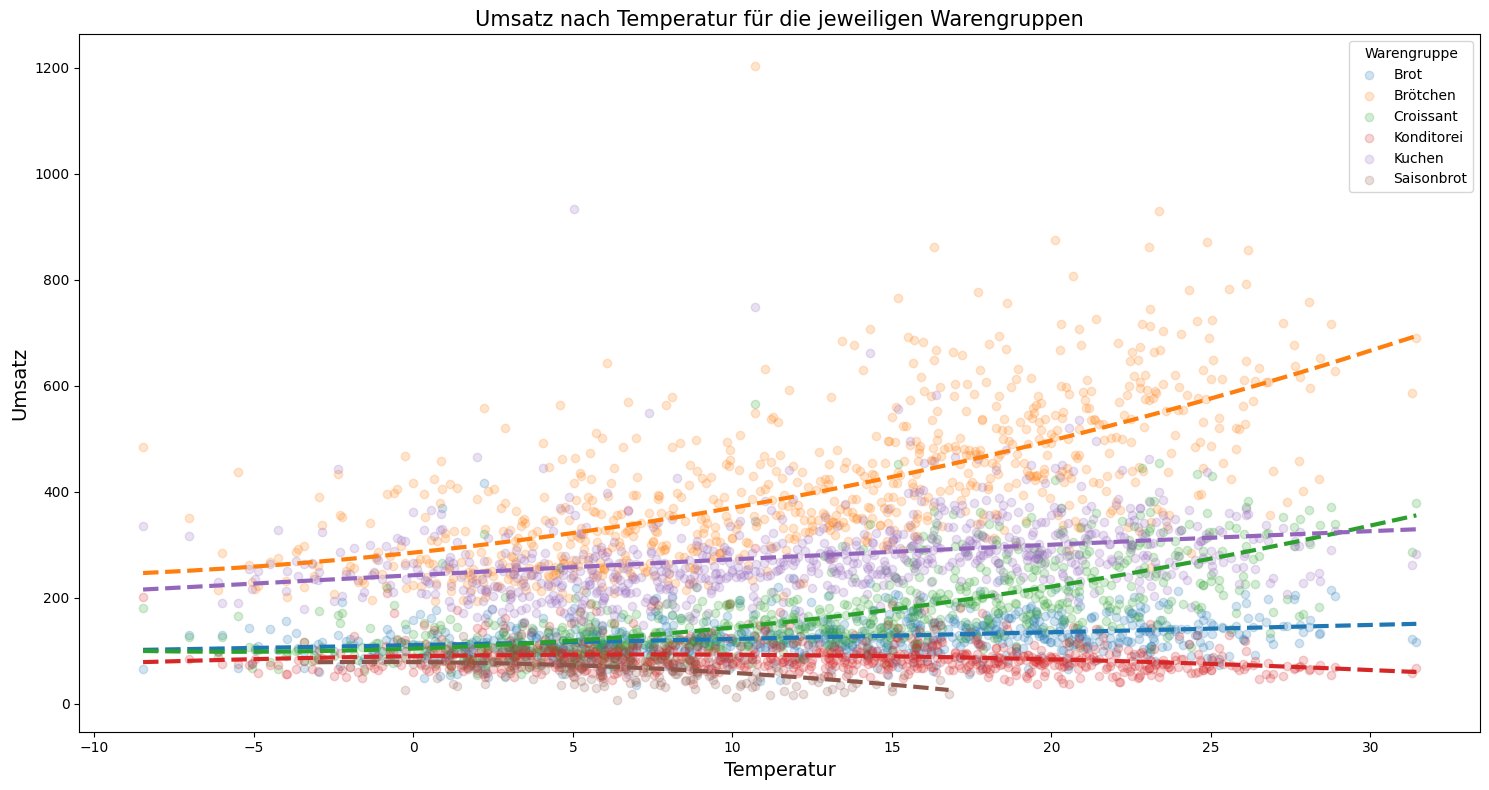

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Calculation of the mean Umsatz for same Temperatur
df_w_mean_umsatz = df_umsatz_kiwo_wetter.groupby(['Temperatur', 'Warengruppe'])['Umsatz'].mean().reset_index()

# Create a multi-line plot
plt.figure(figsize=(15, 8))
plt.style.use('default')

# Define a dictionary to map Warengruppe codes to descriptive names
warengruppe_names = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'   
}


# Plot Umsatz for each Warengruppe
for group in df_w_mean_umsatz['Warengruppe'].unique():
    group_data = df_w_mean_umsatz[df_w_mean_umsatz['Warengruppe'] == group]

    # Use the descriptive name from the dictionary, with a fallback to the original group code
    legend_name = warengruppe_names.get(group, f'Warengruppe {group}')
    #Creation of the plot
    plt.scatter(group_data['Temperatur'], group_data['Umsatz'], 
             label=f'{legend_name}',alpha=0.2)
    
    
    
# Trend line (polynomial regression)
    z = np.polyfit(group_data['Temperatur'], group_data['Umsatz'], 2)
    p = np.poly1d(z)
    plt.plot(group_data['Temperatur'], p(group_data['Temperatur']), 
             linestyle='--', linewidth=3)
    
    

plt.title('Umsatz nach Temperatur für die jeweiligen Warengruppen', fontsize=15)
plt.xlabel('Temperatur', fontsize=14)
plt.ylabel('Umsatz', fontsize=14)
plt.legend(title='Warengruppe', loc='best')
plt.tight_layout()


plt.show()